In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

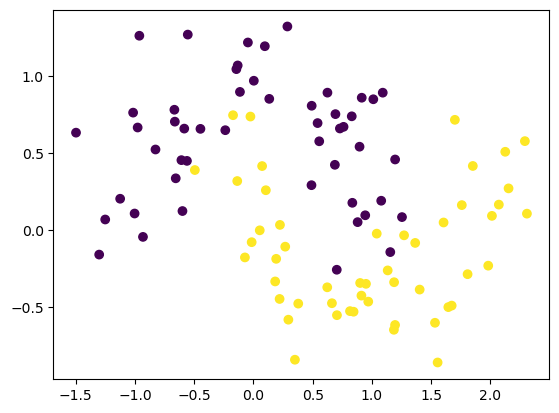

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=200, validation_split = 0.2,verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 1.0000 - loss: 1.1607e-04 - val_accuracy: 0.9500 - val_loss: 1.0035
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9492 - loss: 0.2680 - val_accuracy: 0.9500 - val_loss: 0.9963
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9734 - loss: 0.0612 - val_accuracy: 0.9000 - val_loss: 1.6150
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9000 - val_loss: 1.3314
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9641 - loss: 0.1776 - val_accuracy: 0.9500 - val_loss: 0.2259
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9656 - loss: 0.2417 - val_accuracy: 0.9500 - val_loss: 0.4182
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9820 - loss: 0.0181 - val_accuracy: 0.9500 - val_loss: 0.9379
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 5.8444e-04 - val_accuracy: 0.9000 - v

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 457us/step


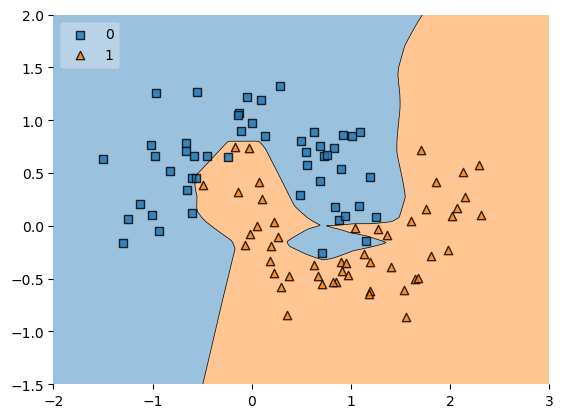

In [13]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

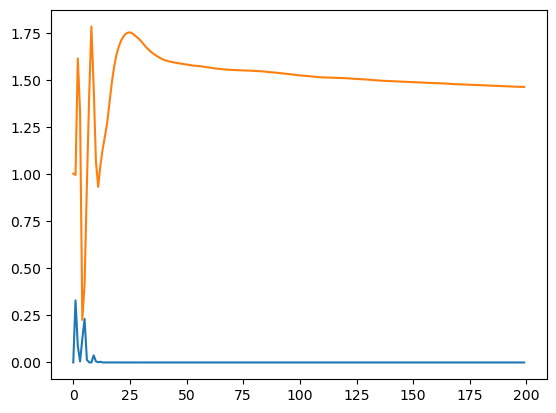

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [17]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=200, validation_split = 0.2,verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9719 - loss: 0.2149 - val_accuracy: 0.9500 - val_loss: 0.3272
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9477 - loss: 0.2086 - val_accuracy: 0.9500 - val_loss: 0.2708
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9617 - loss: 0.1693 - val_accuracy: 0.9500 - val_loss: 0.3059
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9898 - loss: 0.1693 - val_accuracy: 0.9500 - val_loss: 0.3245
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9516 - loss: 0.1671 - val_accuracy: 0.9500 - val_loss: 0.3617
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9633 - loss: 0.1728 - val_accuracy: 0.9500 - val_loss: 0.2918
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9937 - loss: 0.1477 - val_accuracy: 0.9500 - val_loss: 0.2674
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9656 - loss: 0.1673 - val_accuracy: 0.9500 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 458us/step


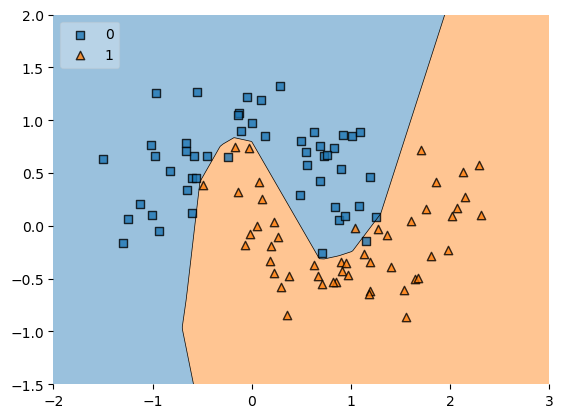

In [25]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

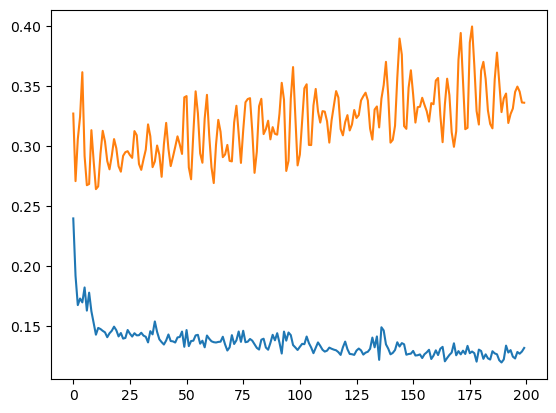

In [27]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [29]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

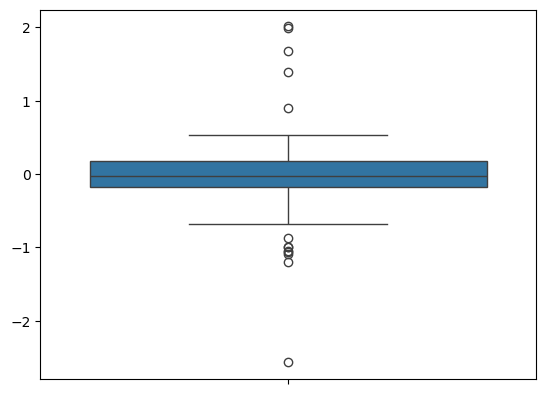

In [31]:
sns.boxplot(model1_weight_layer1)

<Axes: >

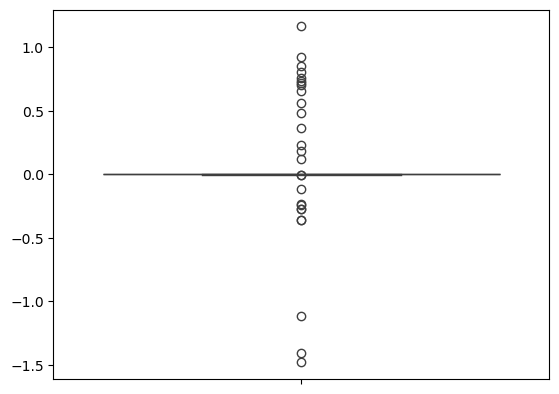

In [33]:
sns.boxplot(model2_weight_layer1)

In [35]:
model1_weight_layer1.min()

-2.56797

In [37]:
model2_weight_layer1.min()

-1.4802576

C:\Users\parvez\AppData\Local\Temp\ipykernel_12100\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\parvez\AppData\Local\Temp\ipykernel_12100\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

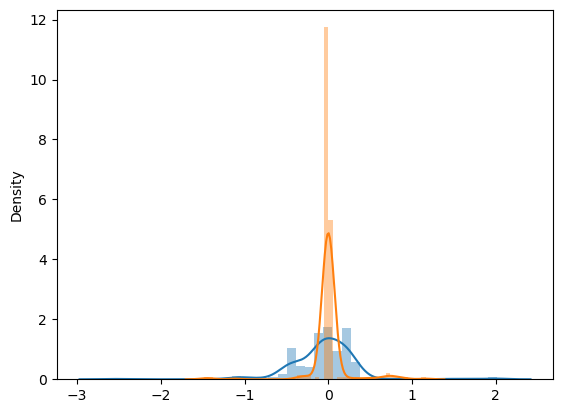

In [39]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [41]:
model1.get_weights()[0].reshape(256)

array([-3.66591394e-01, -4.54930067e-01, -3.91350180e-01,  2.83991814e-01,
       -1.21065062e-02, -1.87593654e-01,  2.99838156e-01,  3.70178707e-02,
        2.45149970e-01, -6.07994139e-01, -1.89593644e-03,  2.04903334e-01,
       -1.90262452e-01,  1.69967294e-01, -1.82418730e-02, -2.37841934e-01,
        3.26247096e-01,  2.57527620e-01, -3.87359053e-01, -4.90920097e-01,
        3.56473736e-02, -9.97862816e-02, -4.80282605e-01,  1.22627035e-01,
        3.55376154e-02,  2.01904476e-01, -1.30529895e-01, -1.74955666e-01,
       -5.25836945e-01, -7.89824650e-02, -4.19374824e-01, -1.04890339e-01,
       -4.96172726e-01, -1.25251025e-01,  7.93106705e-02, -4.12877947e-01,
        2.12153479e-01, -3.66073430e-01, -5.28574288e-01, -1.87839400e-02,
       -9.38405991e-02, -1.90439463e-01, -2.01631449e-02,  2.52481222e-01,
       -4.84714925e-01, -1.18853018e-01, -1.48813695e-01,  2.03100294e-01,
        9.48927030e-02,  1.64370388e-01,  8.86663795e-02,  1.72167718e-01,
        2.15617940e-01,  